In [4]:
import json
import re
import sys
import pandas as pd
import numpy as np


ImportError: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.

ImportError: numpy._core.multiarray failed to import

In [ ]:
df_train = pd.read_csv('../storage/train_data/train-250315-01.csv')
df_train.head()

NameError: name 'pd' is not defined

In [ ]:
df_train['모집공고일_년월'] = pd.to_datetime(df_train['모집공고일']).dt.strftime('%Y%m').astype(int)
df_train['모집공고일_년월']

0        202502
1        202502
2        202502
3        202502
4        202502
          ...  
19819    202003
19820    202003
19821    202003
19822    202003
19823    202003
Name: 모집공고일_년월, Length: 19824, dtype: int64

In [ ]:
df_real_estate_price = pd.read_csv('서울_전체_월별_법정동별_실거래가_평균.csv', encoding='cp949')
df_real_estate_price

,년월,구,법정동,법정동시군구코드,법정동읍면동코드,거래금액(만원),전용면적당 거래금액(만원),법정동코드
0,202501,강남구,개포동,11680,10300,237042.451613,3379.567200,1168010300
1,202501,강남구,논현동,11680,10800,159525.000000,1940.551981,1168010800
2,202501,강남구,대치동,11680,10600,357196.153846,3286.645631,1168010600
3,202501,강남구,도곡동,11680,11800,261500.000000,2646.709886,1168011800
4,202501,강남구,삼성동,11680,10500,266062.500000,2930.899752,1168010500
...,...,...,...,...,...,...,...,...
14747,202012,중랑구,면목동,11260,10100,58877.777778,865.857283,1126010100
14748,202012,중랑구,묵동,11260,10400,69147.222222,887.297813,1126010400
14749,202012,중랑구,상봉동,11260,10200,63295.454545,900.506401,1126010200
14750,202012,중랑구,신내동,11260,10600,57373.943662,842.389505,1126010600


In [ ]:
def apply_price_diff(row):
    b_code = row['법정동코드']
    date = row['모집공고일_년월']
    offer_price = row['전용면적당 공급금액(최고가기준)']

    mask = (df_real_estate_price['법정동코드'] == b_code) & (df_real_estate_price['년월'] == date)
    matched_rows = df_real_estate_price[mask]

    if matched_rows.empty:
        # 매칭된 데이터가 없을 때 기본값 처리 (예: NaN)
        return np.nan

    real_price = matched_rows.iloc[0]['전용면적당 거래금액(만원)']
    price_diff = offer_price - real_price

    return price_diff

df_train['전용면적당 시세차익'] = df_train.apply(apply_price_diff, axis=1)

In [ ]:
df_train_seoul = df_train[df_train['공급지역명'] == '서울']

In [ ]:
df_train_seoul.drop(columns='모집공고일_년월', inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_10320\3224094192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_seoul.drop(columns='모집공고일_년월', inplace=True)


In [ ]:
df_train_seoul = pd.read_csv('서울_청약_매물_시세차익_데이터.csv', encoding='cp949')
df_train_seoul.head()

,공고번호,주택명,공급지역코드,공급지역명,공급위치우편번호,공급위치,공급규모,모집공고일,청약접수시작일,청약접수종료일,...,위도,경도,행정동코드,법정동코드,시도,시군구,읍면동1,읍면동2,전용면적당 공급금액(최고가기준),전용면적당 시세차익
0,2025000001,래미안 원페를라,100,서울,6562,서울특별시 서초구 방배동 818-14번지 일대,482,2025-01-17,2025-02-03,2025-02-06,...,37.491279,126.987523,1.165062e+09,1.165010e+09,서울,서초구,방배4동,방배동,2.923220e+07,2.922989e+07
1,2025000001,래미안 원페를라,100,서울,6562,서울특별시 서초구 방배동 818-14번지 일대,482,2025-01-17,2025-02-03,2025-02-06,...,37.491279,126.987523,1.165062e+09,1.165010e+09,서울,서초구,방배4동,방배동,2.923220e+07,2.922989e+07
2,2025000001,래미안 원페를라,100,서울,6562,서울특별시 서초구 방배동 818-14번지 일대,482,2025-01-17,2025-02-03,2025-02-06,...,37.491279,126.987523,1.165062e+09,1.165010e+09,서울,서초구,방배4동,방배동,2.923220e+07,2.922989e+07
3,2025000001,래미안 원페를라,100,서울,6562,서울특별시 서초구 방배동 818-14번지 일대,482,2025-01-17,2025-02-03,2025-02-06,...,37.491279,126.987523,1.165062e+09,1.165010e+09,서울,서초구,방배4동,방배동,2.923220e+07,2.922989e+07
4,2025000001,래미안 원페를라,100,서울,6562,서울특별시 서초구 방배동 818-14번지 일대,482,2025-01-17,2025-02-03,2025-02-06,...,37.491279,126.987523,1.165062e+09,1.165010e+09,서울,서초구,방배4동,방배동,2.984068e+07,2.983836e+07


In [ ]:
df_train_seoul.isna().sum()

공고번호                   0
주택명                    0
공급지역코드                 0
공급지역명                  0
공급위치우편번호               0
공급위치                   0
공급규모                   0
모집공고일                  0
청약접수시작일                0
청약접수종료일                0
당첨자발표일                 0
투기과열지구                 0
조정대상지역                 0
분양가상한제                 0
정비사업                   0
공공주택지구                 0
대규모택지개발지구              0
수도권내민영공공주택지구           0
주택형                    0
공급세대수                  0
순위                     0
거주지역                   0
접수건수                   0
경쟁률                    0
최저당첨가점                 0
최고당첨가점                 0
평균당첨가점                 0
전용면적                   0
평면유형                   0
미달여부                   0
공급금액(최고가 기준)           0
위도                    48
경도                    48
행정동코드                 80
법정동코드                 68
시도                    48
시군구                   48
읍면동1                  80
읍면동2                  68
전용면적당 공급금액(최고가기준)      0


In [ ]:
df_train_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   공고번호               4080 non-null   int64  
 1   주택명                4080 non-null   object 
 2   공급지역코드             4080 non-null   int64  
 3   공급지역명              4080 non-null   object 
 4   공급위치우편번호           4080 non-null   int64  
 5   공급위치               4080 non-null   object 
 6   공급규모               4080 non-null   int64  
 7   모집공고일              4080 non-null   object 
 8   청약접수시작일            4080 non-null   object 
 9   청약접수종료일            4080 non-null   object 
 10  당첨자발표일             4080 non-null   object 
 11  투기과열지구             4080 non-null   object 
 12  조정대상지역             4080 non-null   object 
 13  분양가상한제             4080 non-null   object 
 14  정비사업               4080 non-null   object 
 15  공공주택지구             4080 non-null   object 
 16  대규모택지개발지구          4080 

<Axes: xlabel='전용면적당 시세차익', ylabel='Count'>

findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
c:\Users\user\anaconda3\envs\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\user\anaconda3\envs\env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Dej

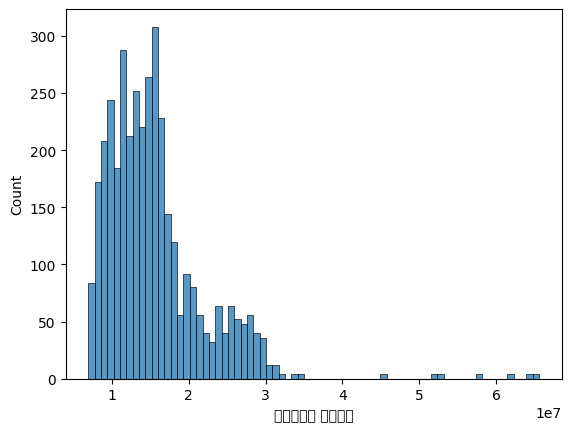

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] =False

sns.histplot(df_train_seoul, x='전용면적당 시세차익')

In [ ]:
서울 = pd.read_csv("./서울_청약_매물_시세차익_데이터.csv", encoding='cp949')
서울.head()[['주택명','주택형','경쟁률']]

,주택명,주택형,경쟁률
0,래미안 원페를라,059.9800A,305.14
1,래미안 원페를라,059.9800A,0.00
2,래미안 원페를라,059.9800A,0.00
3,래미안 원페를라,059.9800A,0.00
4,래미안 원페를라,059.9500B,307.43


In [ ]:
서울['경쟁률'].isna().sum()

np.int64(0)

In [ ]:
서울.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   공고번호               4080 non-null   int64  
 1   주택명                4080 non-null   object 
 2   공급지역코드             4080 non-null   int64  
 3   공급지역명              4080 non-null   object 
 4   공급위치우편번호           4080 non-null   int64  
 5   공급위치               4080 non-null   object 
 6   공급규모               4080 non-null   int64  
 7   모집공고일              4080 non-null   object 
 8   청약접수시작일            4080 non-null   object 
 9   청약접수종료일            4080 non-null   object 
 10  당첨자발표일             4080 non-null   object 
 11  투기과열지구             4080 non-null   object 
 12  조정대상지역             4080 non-null   object 
 13  분양가상한제             4080 non-null   object 
 14  정비사업               4080 non-null   object 
 15  공공주택지구             4080 non-null   object 
 16  대규모택지개발지구          4080 

In [ ]:
서울['전용면적당 시세차익']

0       2.922989e+07
1       2.922989e+07
2       2.922989e+07
3       2.922989e+07
4       2.983836e+07
            ...     
4075    1.990270e+07
4076    1.966794e+07
4077    1.966794e+07
4078    1.966794e+07
4079    1.966794e+07
Name: 전용면적당 시세차익, Length: 4080, dtype: float64

In [ ]:
# 칼럼 수치형 데이터타입 변환
서울["모집공고일"] = pd.to_datetime(서울["모집공고일"])
서울["청약접수시작일"] = pd.to_datetime(서울["청약접수시작일"])
서울["청약접수종료일"] = pd.to_datetime(서울["청약접수종료일"])
서울["당첨자발표일"] = pd.to_datetime(서울["당첨자발표일"])

In [ ]:
# 시세차익 칼럼 생성
서울['시세차익'] = round(서울['전용면적'] * 서울['전용면적당 시세차익'] /10000, 2)
서울['시세차익']

0       172456.32
1       172456.32
2       172456.32
3       172456.32
4       176046.32
          ...    
4075    167182.69
4076    196679.39
4077    196679.39
4078    196679.39
4079    196679.39
Name: 시세차익, Length: 4080, dtype: float64

In [ ]:
서울['평면유형'].unique()

array(['A', 'B', 'C', 'D', 'E', '0', '6', '8', 'F', '5', '4', '1', 'P',
       'T', '3', '9', '7', 'G', 'H', 'I', 'K', 'L', '2', 'J', 'M', 'N',
       'O', 'Q', 'R', 'S', 'U', 'V', 'W'], dtype=object)

In [ ]:
# 수치형변수 간 상관관계 분석
num_cols = ['공급세대수', '경쟁률', '전용면적', '공급금액(최고가 기준)', '법정동코드', '시세차익']
corr_matrix = 서울[num_cols].corr()
print(corr_matrix)


                 공급세대수       경쟁률      전용면적  공급금액(최고가 기준)     법정동코드      시세차익
공급세대수         1.000000 -0.017815  0.038266      0.010433  0.028982  0.004025
경쟁률          -0.017815  1.000000  0.025510      0.015745  0.045066  0.014034
전용면적          0.038266  0.025510  1.000000      0.700772  0.095428  0.701786
공급금액(최고가 기준)  0.010433  0.015745  0.700772      1.000000  0.061637  1.000000
법정동코드         0.028982  0.045066  0.095428      0.061637  1.000000  0.054985
시세차익          0.004025  0.014034  0.701786      1.000000  0.054985  1.000000


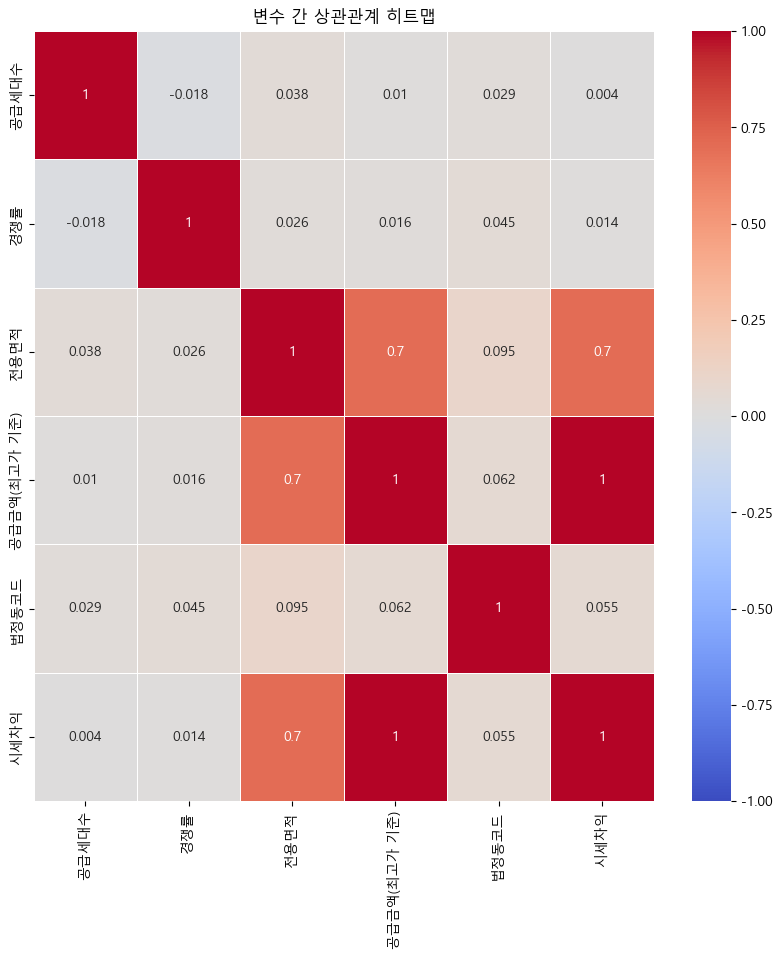

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, vmin=-1, vmax=1)

plt.title("변수 간 상관관계 히트맵")
plt.show()

# 공급금액과 시세차익
# 공급금액과 전용면적
# 시세차익과 전용면적.. 외엔 딱히 유의미한 결과 없음

In [ ]:
# 특정 평면유형별 시세차익 & 경쟁률
sns.boxplot(서울, x='평면유형', y='전용면적당 시세차익')
plt.show()

NameError: name 'sns' is not defined

In [ ]:
# 전용면적 vs 시세차익 & 경쟁률
import plotly.express as px
import plotly.io as pio
#pio.renderers.default = 'browser'

서울 = 서울.dropna(subset=['전용면적당 시세차익', '경쟁률'])

fig = px.scatter(data_frame=서울[서울['경쟁률'] != 0],
           x = '전용면적',
           y = '전용면적당 시세차익',
           color = '경쟁률',
           color_continuous_scale= px.colors.sequential.Emrld_r)


fig.show()

NameError: name '서울' is not defined

In [ ]:
서울[서울['경쟁률'] != 0]

,공고번호,주택명,공급지역코드,공급지역명,공급위치우편번호,공급위치,공급규모,모집공고일,청약접수시작일,청약접수종료일,...,위도,경도,행정동코드,법정동코드,시도,시군구,읍면동1,읍면동2,전용면적당 공급금액(최고가기준),전용면적당 시세차익
0,2025000001,래미안 원페를라,100,서울,6562,서울특별시 서초구 방배동 818-14번지 일대,482,2025-01-17,2025-02-03,2025-02-06,...,37.491279,126.987523,1.165062e+09,1.165010e+09,서울,서초구,방배4동,방배동,2.923220e+07,2.922989e+07
4,2025000001,래미안 원페를라,100,서울,6562,서울특별시 서초구 방배동 818-14번지 일대,482,2025-01-17,2025-02-03,2025-02-06,...,37.491279,126.987523,1.165062e+09,1.165010e+09,서울,서초구,방배4동,방배동,2.984068e+07,2.983836e+07
8,2025000001,래미안 원페를라,100,서울,6562,서울특별시 서초구 방배동 818-14번지 일대,482,2025-01-17,2025-02-03,2025-02-06,...,37.491279,126.987523,1.165062e+09,1.165010e+09,서울,서초구,방배4동,방배동,3.044915e+07,3.044683e+07
12,2025000001,래미안 원페를라,100,서울,6562,서울특별시 서초구 방배동 818-14번지 일대,482,2025-01-17,2025-02-03,2025-02-06,...,37.491279,126.987523,1.165062e+09,1.165010e+09,서울,서초구,방배4동,방배동,2.800833e+07,2.800602e+07
16,2025000001,래미안 원페를라,100,서울,6562,서울특별시 서초구 방배동 818-14번지 일대,482,2025-01-17,2025-02-03,2025-02-06,...,37.491279,126.987523,1.165062e+09,1.165010e+09,서울,서초구,방배4동,방배동,2.902024e+07,2.901792e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,2020000312,르엘 신반포,100,서울,6509,서울특별시 서초구 잠원동 74번지 외 1필지,67,2020-03-20,2020-03-30,2020-04-01,...,37.508346,127.002135,1.165058e+09,1.165011e+09,서울,서초구,반포3동,잠원동,2.105556e+07,2.105350e+07
4064,2020000312,르엘 신반포,100,서울,6509,서울특별시 서초구 잠원동 74번지 외 1필지,67,2020-03-20,2020-03-30,2020-04-01,...,37.508346,127.002135,1.165058e+09,1.165011e+09,서울,서초구,반포3동,잠원동,2.084746e+07,2.084540e+07
4068,2020000312,르엘 신반포,100,서울,6509,서울특별시 서초구 잠원동 74번지 외 1필지,67,2020-03-20,2020-03-30,2020-04-01,...,37.508346,127.002135,1.165058e+09,1.165011e+09,서울,서초구,반포3동,잠원동,1.967857e+07,1.967651e+07
4072,2020000312,르엘 신반포,100,서울,6509,서울특별시 서초구 잠원동 74번지 외 1필지,67,2020-03-20,2020-03-30,2020-04-01,...,37.508346,127.002135,1.165058e+09,1.165011e+09,서울,서초구,반포3동,잠원동,1.990476e+07,1.990270e+07


In [ ]:
서울[서울['시세차익'].isna()]

NameError: name '서울' is not defined

In [ ]:
# 지도에 시세차익 분포 확인
import folium
from IPython.display import display

# 지도 중심 위치 설정 (서울 중심 좌표 예시)
map_center = [37.541, 126.986]
m = folium.Map(location=map_center, zoom_start=14, width = "100%", height="100%")

# 마커 추가 (경쟁률을 반영한 크기로 표현)
for idx, row in 서울.dropna().iterrows():
    radius =  (row["시세차익"]  / 300) if row["시세차익"] > 1000 else  row["시세차익"] / 20

    folium.CircleMarker(
        location=[row["위도"], row["경도"]],
        radius=radius,  # 경쟁률에 따른 크기 조절 (곱하기 값 조절 가능)
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=0.5,
        popup=f"시세차익: {row['시세차익']}"
    ).add_to(m)

m.save("map.html")

ImportError: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.

ImportError: DLL load failed while importing _multiarray_umath: 지정된 모듈을 찾을 수 없습니다.

NameError: name '서울' is not defined